In [27]:
from google.colab import drive
drive.mount('/content/drive/') #/Colab_notebooks/Python_Files

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#Importing the Packages

In [28]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Command to tell Python to actually display the graphs

%matplotlib inline

import plotly.express as px

#Importing the Data

In [29]:
#import the data
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Python_Files/austo_automobile.csv')

**Context**

Analysts are required to explore data and reflect on the insights. Clear writing skill is an integral part of a good report. Note that the explanations must be such that readers with minimum knowledge of analytics is able to grasp the insight.

Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

**Objective**

They want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. Suppose you are a Data Scientist at the company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

**Data Description**
- Age: The age of the individual in years.
- Gender: The gender of the individual, categorized as male or female.
- Profession: The occupation or profession of the individual.
- Marital_status: The marital status of the individual, such as married &, single
- Education: The educational qualification of the individual Graduate and Post Graduate
- No_of_Dependents: The number of dependents (e.g., children, elderly parents) that the individual supports financially.
- Personal_loan: A binary variable indicating whether the individual has taken a personal loan "Yes" or "No"
- House_loan: A binary variable indicating whether the individual has taken a housing loan "Yes" or "No"
- Partner_working: A binary variable indicating whether the individual's partner is employed "Yes" or "No"
- Salary: The individual's salary or income.
- Partner_salary: The salary or income of the individual's partner, if applicable.
- Total_salary: The total combined salary of the individual and their partner (if applicable).
- Price: The price of a product or service.
- Make: The type of automobile

In [30]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.000,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.000,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.000,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.000,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.000,139900,57000,SUV


In [31]:
df.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.000,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.000,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600,0.000,31600,31000,Hatchback


In [32]:
# checking shape of the data
print("There are", df.shape [0], 'rows and', df.shape[1], "columns.")

There are 1581 rows and 14 columns.


##Checking the datatype of the columns

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


- Several genders are absent from this dataset. Further investigation is necessary to determine the reasons behind their absence.
- Additionally, there is a lack of data in the "Partner_salary" field, which requires investigation to comprehend the underlying reasons for its absence.

In [34]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

##Getting the statistical summary for the dataset

In [35]:
# statistical summery
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1581.000,NaN,NaN,NaN,31.922,8.426,22.000,25.000,29.000,38.000,54.000
Gender,1528,4,Male,1199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,1581,2,Salaried,896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,1581,2,Married,1443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,1581,2,Post Graduate,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_Dependents,1581.000,NaN,NaN,NaN,2.458,0.943,0.000,2.000,2.000,3.000,4.000
Personal_loan,1581,2,Yes,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_loan,1581,2,No,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner_working,1581,2,Yes,868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,1581.000,NaN,NaN,NaN,60392.220,14674.825,30000.000,51900.000,59500.000,71800.000,99300.000


In [36]:
df.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000,1581.000,1581.000,1475.000,1581.000,1581.000
mean,31.922,2.458,60392.220,20225.559,79625.996,35597.723
std,8.426,0.943,14674.825,19573.149,25545.858,13633.637
min,22.000,0.000,30000.000,0.000,30000.000,18000.000
25%,25.000,2.000,51900.000,0.000,60500.000,25000.000
50%,29.000,2.000,59500.000,25600.000,78000.000,31000.000
75%,38.000,3.000,71800.000,38300.000,95900.000,47000.000
max,54.000,4.000,99300.000,80500.000,171000.000,70000.000


- The average and maximum ages are 31.92 and 54 years, respectively. Given the significant gap between the average and maximum ages, there might be outliers present in the age data, warranting further analysis.

- Regarding the "Total_salary" field, it is expected to exhibit a right skew, possibly containing outliers. These outliers may have some correlation with the "Salary" and "Partner_salary" fields. Investigating whether this column contains outliers is essential.

- Categories such as gender, profession, marital status, and education can be considered for analysis.

- The mean and maximum number of dependents are 2.45 and 4 persons, respectively.

- Up to the first quartile, the partner's salary is recorded as 0 rupees.

## Lets check where we can find the null values

In [37]:
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [38]:
df.duplicated().sum()

0

- There are no repeated values, although there are 53 instances where gender information is missing and 106 instances where partner salary data is absent.

In [39]:
df['Gender'].value_counts()

Gender
Male      1199
Female     327
Femal        1
Femle        1
Name: count, dtype: int64

- There are two incorrect entries for gender, namely "Femal" and "Femle"



In [40]:
df['Gender'].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [41]:
# replacing the Female typo error fields
df['Gender']=df['Gender'].replace(['Femal','Femle'],'Female')

In [42]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [43]:
df['Gender'].value_counts()

Gender
Male      1199
Female     329
Name: count, dtype: int64

In [44]:
# need to understand why there are few missing gender fields
df.loc[df['Gender'].isnull()==True]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
24,46,NaN,Business,Married,Post Graduate,3,Yes,No,Yes,78000,600.000,78600,50000,SUV
25,46,NaN,Salaried,Married,Post Graduate,3,No,No,Yes,87900,700.000,88600,50000,SUV
67,53,NaN,Salaried,Married,Graduate,4,Yes,No,Yes,80900,30000.000,110900,49000,SUV
125,47,NaN,Salaried,Single,Post Graduate,2,Yes,No,No,87200,0.000,87200,49000,SUV
203,44,NaN,Salaried,Single,Post Graduate,0,Yes,No,No,68600,0.000,68600,50000,SUV
302,41,NaN,Salaried,Married,Graduate,1,Yes,No,No,55900,0.000,55900,32000,Sedan
325,40,NaN,Business,Married,Graduate,1,No,Yes,No,59600,0.000,59600,31000,Sedan
463,36,NaN,Salaried,Married,Post Graduate,3,Yes,No,No,66600,0.000,66600,49000,SUV
485,35,NaN,Business,Married,Post Graduate,2,Yes,Yes,Yes,61600,25000.000,86600,31000,Sedan
528,34,NaN,Salaried,Single,Post Graduate,2,No,Yes,No,64800,0.000,64800,32000,Sedan


In [45]:
df.loc[df['Gender'].isnull()==True].shape[0]

53

- It appears that there is no discernible relationship between the missing values in the "Gender" field and any other fields in the dataset.
- Mode of gender is Male.
- So filling all null fields in the "Gender" column with "Male" is a reasonable approach to handle missing values.

In [46]:
df['Gender'].fillna('Male',inplace=True)

- We have replaced all the null field present in the gender with 'Unknown'

In [47]:
df.loc[df['Gender'].isnull()==True]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


In [48]:
# need to understand why there are few missing Partner_salary fields
df.loc[df['Partner_salary'].isnull()==True]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
40,53,Female,Salaried,Married,Graduate,1,Yes,No,No,72100,NaN,72100,60000,SUV
43,52,Male,Salaried,Married,Post Graduate,3,No,No,Yes,87600,NaN,88200,51000,SUV
49,52,Female,Business,Married,Post Graduate,4,No,No,Yes,90300,NaN,170400,69000,SUV
59,54,Male,Salaried,Married,Graduate,3,Yes,No,Yes,80600,NaN,81000,51000,SUV
111,48,Female,Business,Married,Graduate,3,No,No,Yes,90300,NaN,161100,62000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,22,Male,Business,Married,Post Graduate,3,Yes,No,No,52100,NaN,52100,28000,Hatchback
1567,22,Male,Salaried,Single,Graduate,0,Yes,Yes,No,39700,NaN,39700,23000,Hatchback
1568,22,Male,Salaried,Married,Graduate,3,No,Yes,No,38000,NaN,38000,23000,Sedan
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback


- There are totally 106 rows where partner salary is missing.

In [49]:
# to uderstand if that is related to partner not working
df[df['Partner_salary'].isnull()==True].groupby('Partner_working').size()

Partner_working
No     90
Yes    16
dtype: int64

- We discovered that the null value in partner_salary is unrelated to whether the partner is employed or not.
- We have the option to modify the field for instances where the partner is not working and assign a salary value of 0 to those entries.

In [50]:
#Assigning zero salary to Partner_salary where Partner is not working
df.loc[df['Partner_working']=='No', 'Partner_salary']=0

In [51]:
df[df['Partner_salary'].isnull()==True].shape

(16, 14)

- Currently, there is only one instance of missing partner salary, which is for 16 cases where the partner is employed but the salary is unspecified.

In [52]:
df[df['Partner_salary'].isnull()==True]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
43,52,Male,Salaried,Married,Post Graduate,3,No,No,Yes,87600,NaN,88200,51000,SUV
49,52,Female,Business,Married,Post Graduate,4,No,No,Yes,90300,NaN,170400,69000,SUV
59,54,Male,Salaried,Married,Graduate,3,Yes,No,Yes,80600,NaN,81000,51000,SUV
111,48,Female,Business,Married,Graduate,3,No,No,Yes,90300,NaN,161100,62000,SUV
209,43,Female,Salaried,Married,Graduate,4,Yes,No,Yes,53400,NaN,123900,64000,SUV
284,41,Female,Business,Married,Post Graduate,2,No,No,Yes,70500,NaN,105800,33000,Sedan
339,39,Male,Salaried,Married,Post Graduate,2,Yes,No,Yes,76800,NaN,115400,50000,Sedan
376,38,Male,Salaried,Married,Post Graduate,2,Yes,No,Yes,79000,NaN,117400,46000,Sedan
424,37,Female,Salaried,Married,Graduate,2,Yes,Yes,Yes,62000,NaN,100700,46000,Sedan
444,36,Male,Business,Married,Post Graduate,2,No,No,Yes,72300,NaN,112400,48000,Sedan


- If we subtract the individual's salary from the total salary, we will obtain the partner's salary.

In [53]:
# filling missing partner_salary values
df['Partner_salary'].fillna(df['Total_salary']-df['Salary'],inplace=True)

In [54]:
df[df['Partner_salary'].isnull()==True].shape

(0, 14)

- So there are no null values in partner_salary

In [55]:
# Add a new column 'total_sal_dup' which is the sum of 'Salary' and 'Partner_salary'
df['total_sal_dup'] = df['Salary'] + df['Partner_salary']
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make,total_sal_dup
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.000,170000,61000,SUV,170000.000
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.000,165800,61000,SUV,165800.000
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.000,158000,57000,SUV,158000.000
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.000,142800,61000,SUV,142800.000
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.000,139900,57000,SUV,139900.000


In [56]:
# Compare if 'total_sal_dup' matches 'Total_salary' for each row
matches = df['total_sal_dup'] == df['Total_salary']

# Get the value counts of True and False
value_counts = matches.value_counts()

print(value_counts)

True    1581
Name: count, dtype: int64


- it's clear that the field Total_salary is perfect interms of sum value.

**Creating Age groups**

In [57]:
# Define the bins for age groups
bins = [20, 30, 40, 50,60, float('inf')]
labels = ['20-30', '30-40', '40-50', '50-60','>60']

# Create a new column 'Age_group' based on the age bins
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df.head(2)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make,total_sal_dup,Age_group
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.000,170000,61000,SUV,170000.000,50-60
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.000,165800,61000,SUV,165800.000,50-60


#Univariate Analysis


## Age uni-analysis

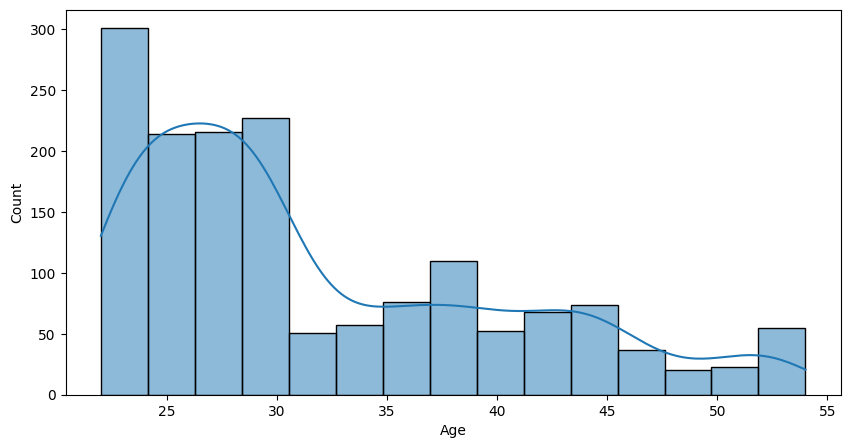

In [58]:
# Age histplot
plt.figure(figsize=(10,5))
sns.histplot(data= df, x= "Age", kde= True);

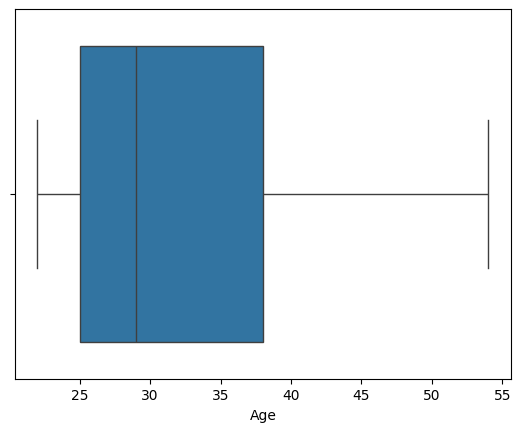

In [59]:
sns.boxplot(data = df, x = 'Age');

**Observations on Age**
- There are no outliers present in the data.
- The distribution displays a right-skewed pattern.
- The median age is approximately 29 years, with the maximum age reaching around 54 years.

##Salary Uni-Analysis

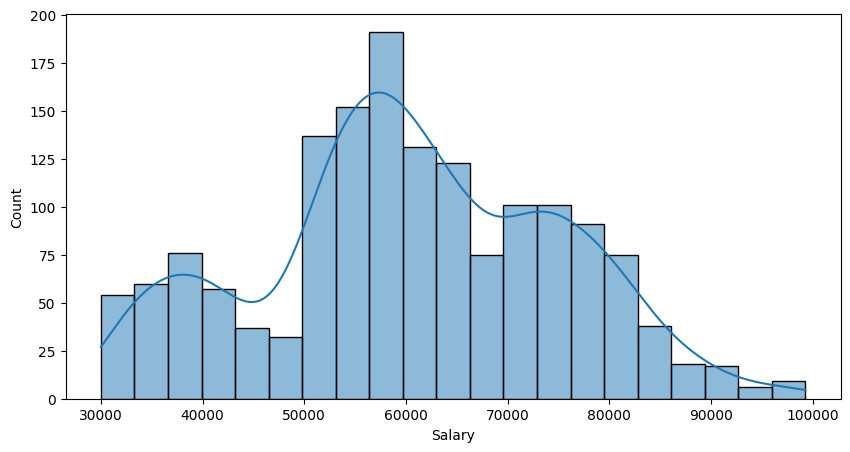

In [60]:
plt.figure(figsize=(10,5))
sns.histplot(data= df, x= "Salary", kde= True);

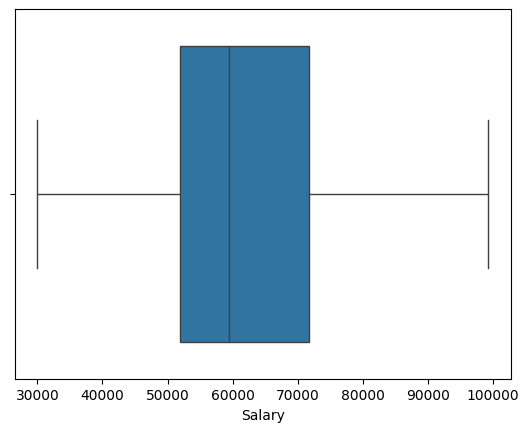

In [61]:
sns.boxplot(data = df, x = 'Salary');


**Salary observations**
- There are no outliers detected, and the distribution does not conform to a normal pattern.
- The median individual salary is approximately INR 59,500, with the maximum salary recorded at INR 93,300.

##Partner_salary Uni-Analysis

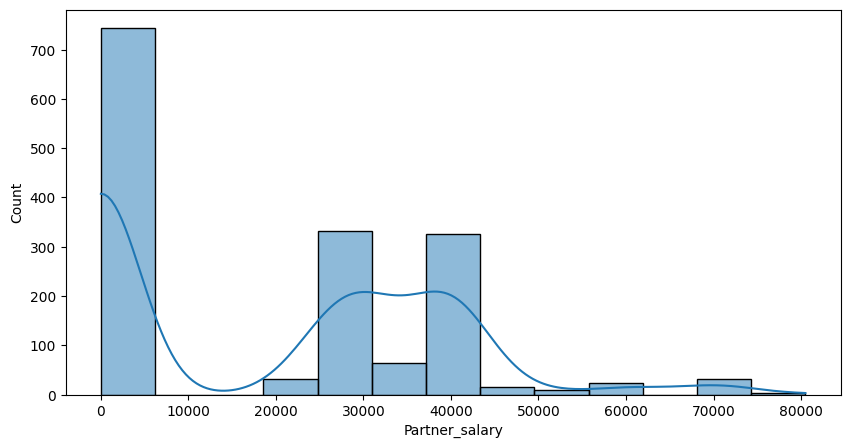

In [62]:
plt.figure(figsize=(10,5))
sns.histplot(data= df, x= "Partner_salary", kde= True);

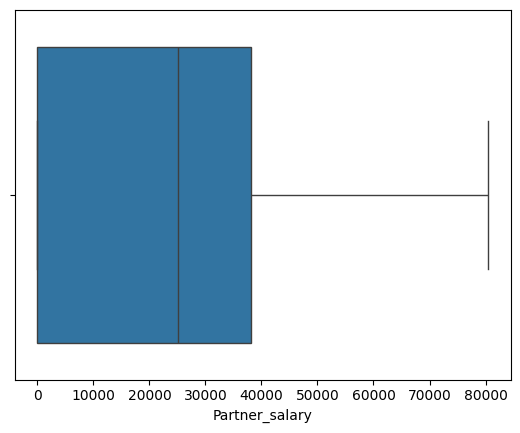

In [63]:
sns.boxplot(data = df, x = 'Partner_salary');

In [64]:
## let's try to understand the partner_saslary more than 65000
df.loc[df['Partner_salary']>71000]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make,total_sal_dup,Age_group
49,52,Female,Business,Married,Post Graduate,4,No,No,Yes,90300,80100.000,170400,69000,SUV,170400.000,50-60
56,51,Female,Salaried,Married,Post Graduate,2,No,No,Yes,90600,80400.000,171000,69000,SUV,171000.000,50-60
116,47,Male,Business,Married,Graduate,4,Yes,No,Yes,86000,80500.000,166500,69000,SUV,166500.000,40-50


**Observations on partner's salary**
- It appears that the total salary is influenced by both partner salary and individual salary, necessitating further analysis.
- Moreover, the distribution exhibits a right-skewed pattern, indicating asymmetry towards higher salary values.

## Total_salary Uni-Analysis

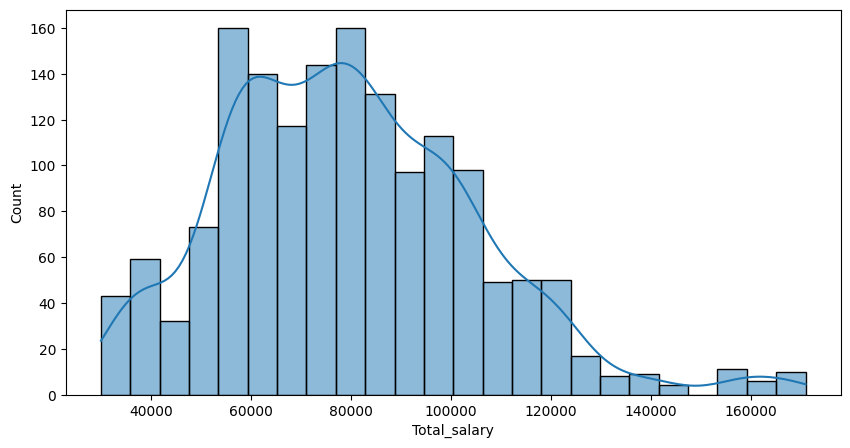

In [65]:
plt.figure(figsize=(10,5))
sns.histplot(data= df, x= "Total_salary", kde= True);

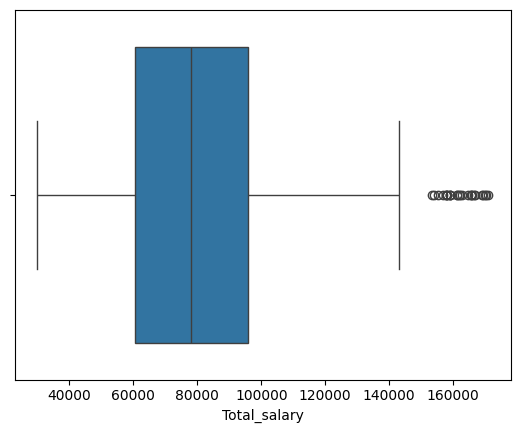

In [66]:
sns.boxplot(data = df, x = 'Total_salary');

- There are few outliers on Total_salary

In [67]:
df.loc[df['Total_salary']>145000]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make,total_sal_dup,Age_group
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.000,170000,61000,SUV,170000.000,50-60
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.000,165800,61000,SUV,165800.000,50-60
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.000,158000,57000,SUV,158000.000,50-60
17,49,Female,Salaried,Married,Post Graduate,4,No,No,Yes,95100,70600.000,165700,64000,SUV,165700.000,40-50
18,49,Female,Business,Married,Post Graduate,3,No,No,Yes,92600,70300.000,162900,58000,SUV,162900.000,40-50
19,49,Male,Salaried,Married,Post Graduate,3,Yes,No,Yes,98400,60600.000,159000,54000,SUV,159000.000,40-50
29,46,Female,Salaried,Married,Post Graduate,2,No,No,Yes,98300,70700.000,169000,61000,SUV,169000.000,40-50
30,46,Male,Salaried,Married,Post Graduate,4,No,No,Yes,94900,70700.000,165600,67000,SUV,165600.000,40-50
31,46,Male,Business,Married,Graduate,2,Yes,No,Yes,91100,70000.000,161100,66000,SUV,161100.000,40-50
41,53,Female,Salaried,Married,Post Graduate,4,No,No,Yes,96600,70300.000,166900,66000,SUV,166900.000,50-60


In [68]:
df.loc[df['Total_salary']>145000].shape

(27, 16)

**Observation on Total Salary**
- It's evident that outliers are present in the total salary column, likely stemming from high individual and partner salaries.

## Price Uni-Analysis

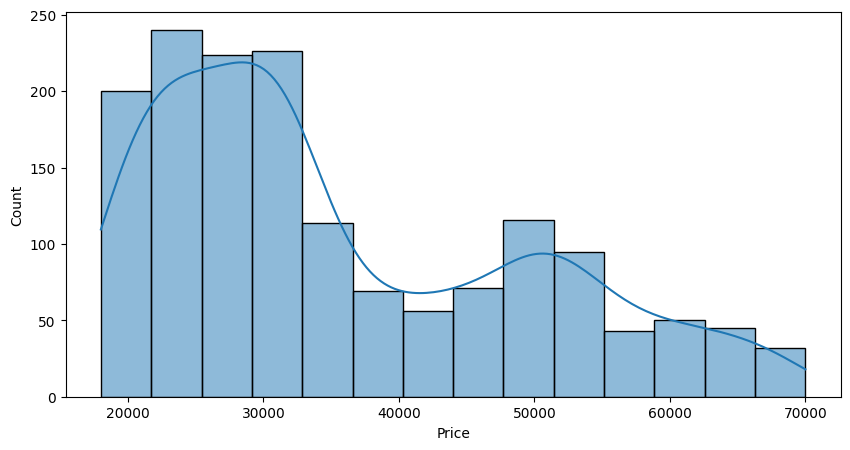

In [69]:
plt.figure(figsize=(10,5))
sns.histplot(data= df, x= "Price", kde= True);

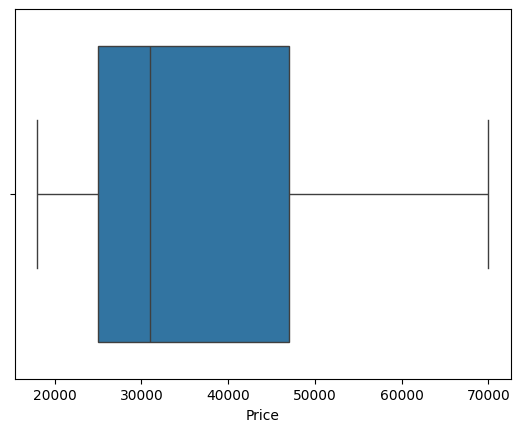

In [70]:
sns.boxplot(data = df, x = 'Price');

**Observation on Price**
- The distribution is skewed to the right and exhibits a bimodal pattern.

#Bivariate Analysis
let's understand how the numerical variables are associated with each other

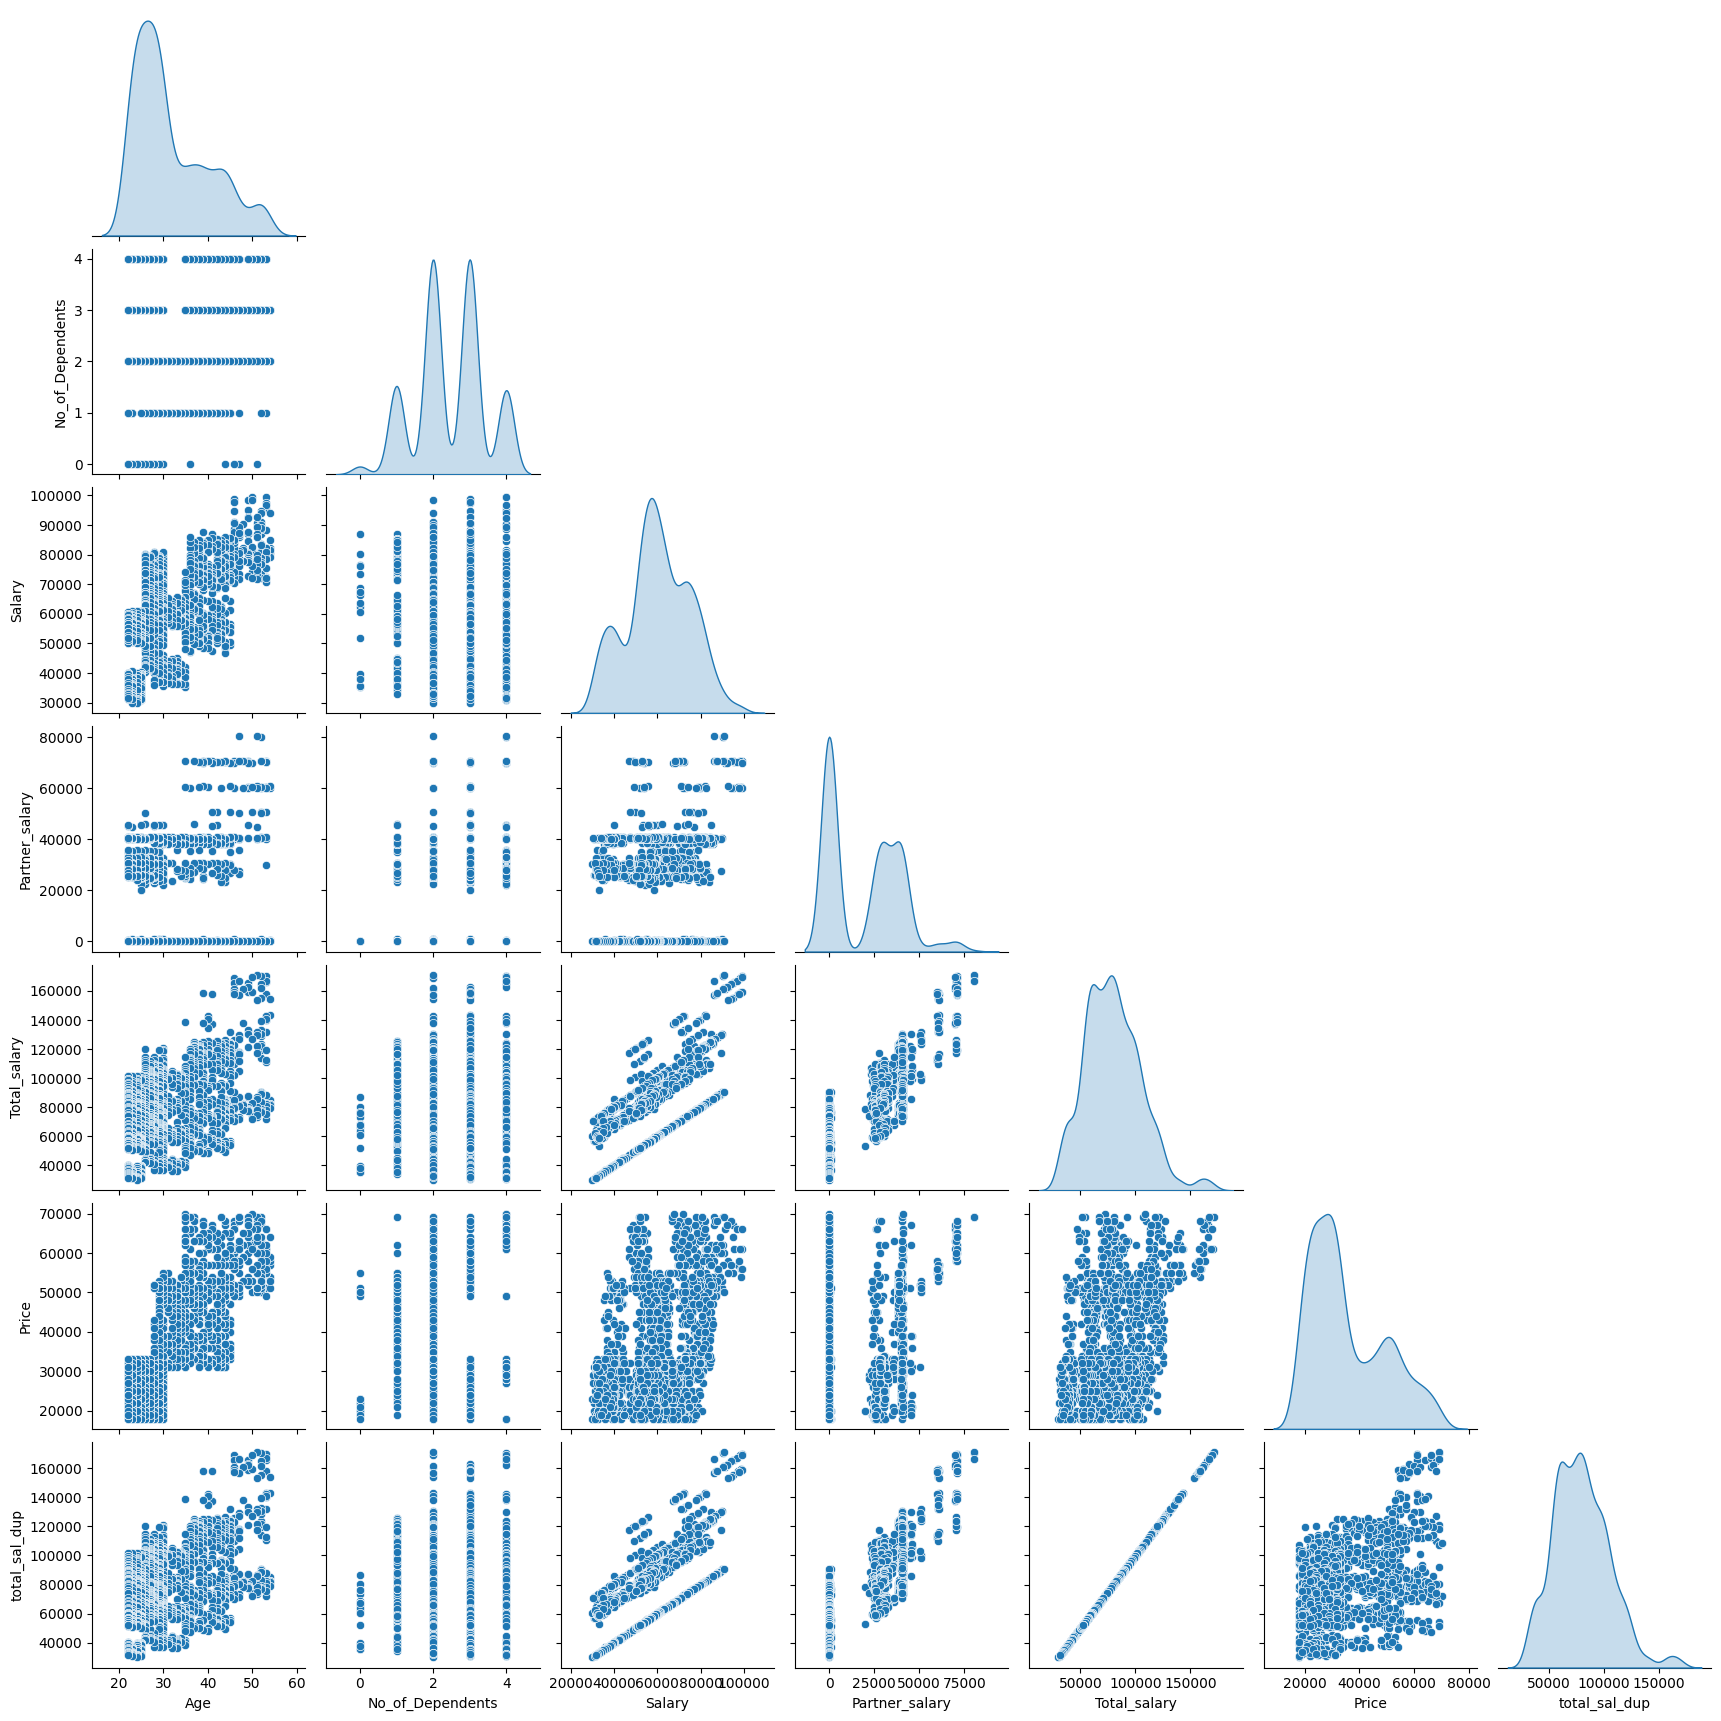

In [71]:
sns.pairplot(df, diag_kind="kde",corner=True);

In [72]:
correlation = df.corr(numeric_only = True)
correlation

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price,total_sal_dup
Age,1.000,-0.190,0.617,0.136,0.459,0.798,0.459
No_of_Dependents,-0.190,1.000,-0.032,0.144,0.093,-0.136,0.093
Salary,0.617,-0.032,1.000,0.087,0.642,0.410,0.642
Partner_salary,0.136,0.144,0.087,1.000,0.820,0.172,0.820
Total_salary,0.459,0.093,0.642,0.820,1.000,0.368,1.000
Price,0.798,-0.136,0.410,0.172,0.368,1.000,0.368
total_sal_dup,0.459,0.093,0.642,0.820,1.000,0.368,1.000


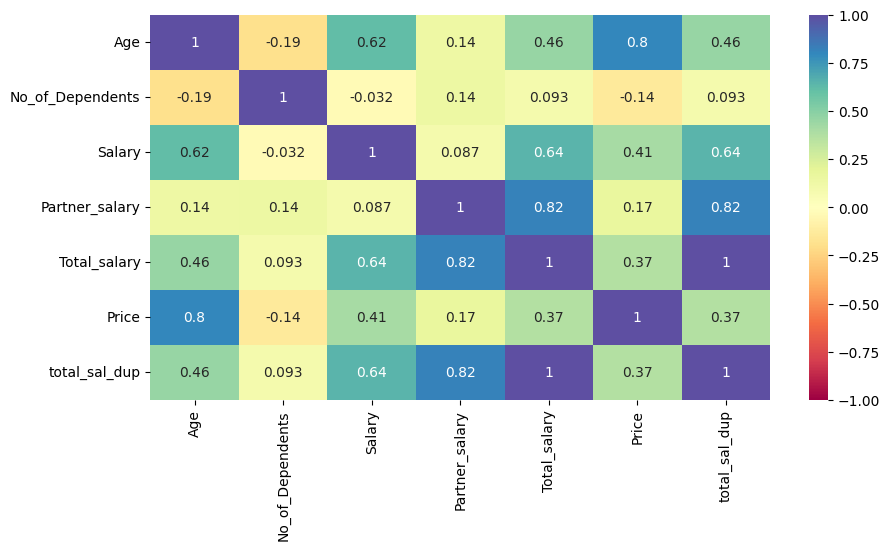

In [73]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only = True),
            annot=True, cmap='Spectral', vmin =-1, vmax=1)
# vmin corelation starts from this point ends at vmax
plt.show()

- We can observe positive correlations between Price and Age, Partner salary and Total salary, as well as individual salary and total salary.
- However, partner's salary appears to have a stronger influence on the total salary.
- Additionally, there seems to be an inverse relationship between the number of dependents and age.

**Let us check if how different genders plays a role in buying cars**

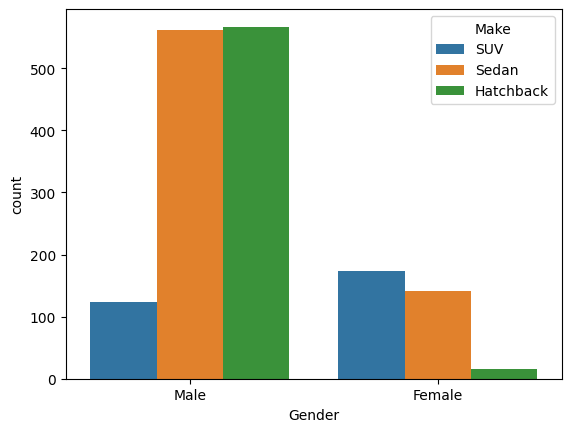

In [74]:
#Do men tend to prefer SUVs more compared to women?
sns.countplot(df,x='Gender',hue='Make');

- Male individuals generally exhibit a higher preference for **hatchback** cars, followed by **sedans**, while female individuals tend to favor **SUVs**, followed by **sedans**.



**Let's check how profession plays an important role in buying cars**

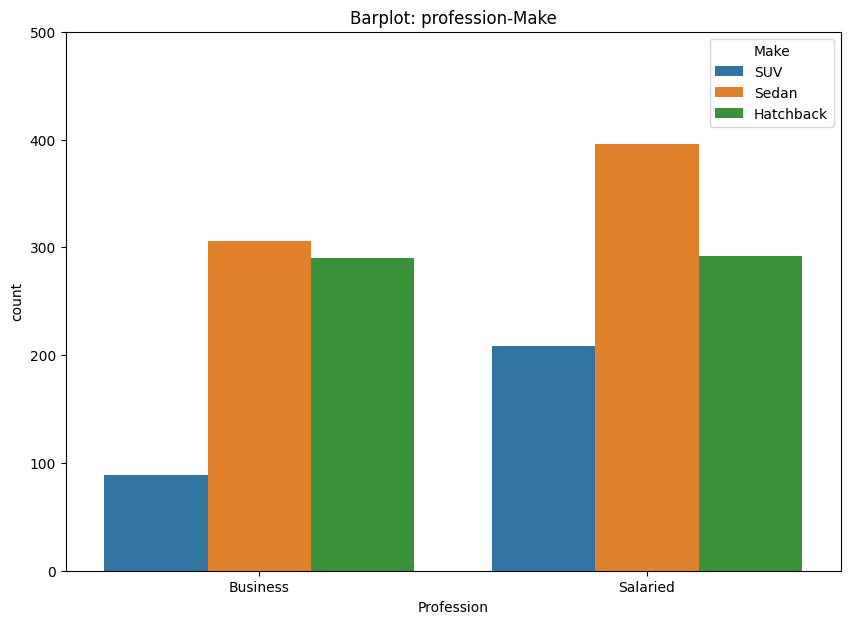

In [75]:
plt.figure(figsize=(10,7))
plt.title('Barplot: profession-Make')
plt.ylim(0,500)

ax=sns.countplot(df,x='Profession',hue='Make');

In [76]:
# counting the total number of salaried individuals who bought a sedan
salaried_sedan_counts= df[(df['Profession']=='Salaried') & (df['Make']=='Sedan')].shape[0]

# total salaried individuals
Total_salaried_counts= df[df['Profession']=='Salaried'].shape[0]

# calculating likelyhood
likelihood=(salaried_sedan_counts/Total_salaried_counts)*100
print('Likelihood of a salaried individual buying a Sedan: ', likelihood ,'%')

Likelihood of a salaried individual buying a Sedan:  44.19642857142857 %


In [77]:
# counting the total number of business man who bought a sedan
salaried_sedan_counts= df[(df['Profession']=='Business') & (df['Make']=='Sedan')].shape[0]

# total salaried individuals
Total_salaried_counts= df[df['Profession']=='Business'].shape[0]

# calculating likelyhood
likelihood=(salaried_sedan_counts/Total_salaried_counts)*100
print('Likelihood of a business man buying a Sedan: ', likelihood ,'%')

Likelihood of a business man buying a Sedan:  44.67153284671533 %


**Let's analyze the Trend of buying cars for Males vs Females with respect to their professions**

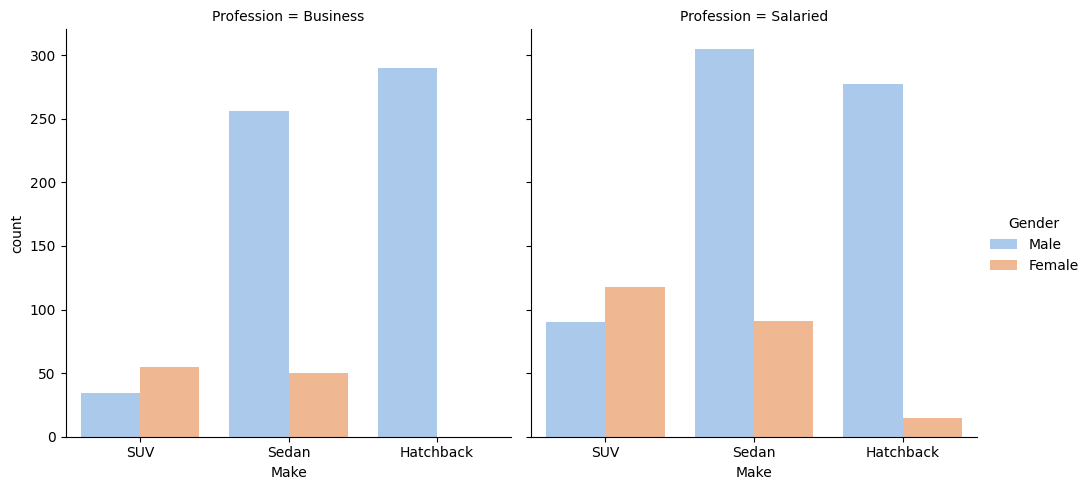

In [78]:
## What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?
sns.catplot(df,col='Profession',x='Make',hue='Gender',kind='count',palette='pastel');

- Male individuals who are salaried tend to show a higher interest in purchasing **sedan** cars rather than SUVs.

**Let's try to analyze the amount spend on purchasing based on the genders**

In [79]:
## use goupby for gender and mean of price
df.groupby('Gender')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,329.000,47705.167,11244.836,20000.000,38000.000,49000.000,55000.000,69000.000
Male,1252.000,32416.134,12366.253,18000.000,23000.000,29000.000,37000.000,70000.000


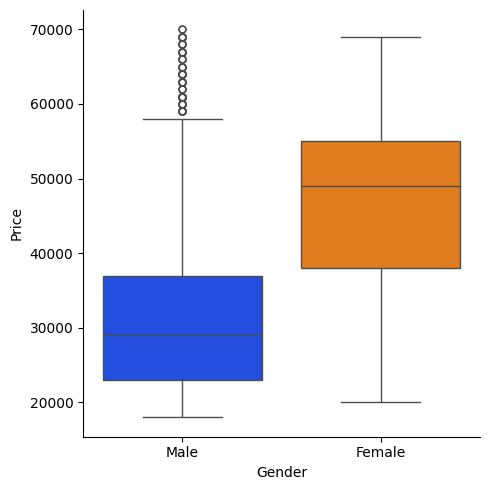

In [80]:
sns.catplot(data=df, x="Gender", y="Price", hue="Gender", kind='box', palette='bright');

- Females tend to have a higher potential for purchasing automobiles or exhibit a tendency to spend more on them compared to males.
- Approximately 75% of male purchases are within 37,000 INR, while for females, more than 75% of purchases start at 38,000 INR and above.
- Additionally, outliers have been observed in male purchasing expenditures.

**Let's try to understand why women's purchasing habit is more significant**
- Previously, we noted that the majority of females are inclined towards purchasing SUVs, followed by sedans.

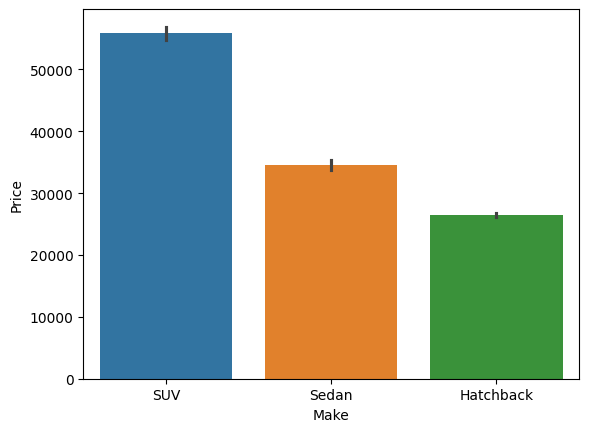

In [81]:
# lets check the price structure for different types of Make

sns.barplot(df,x='Make',y='Price',hue='Make');

- it's clear that SUV and Sedan cars has more price structure.

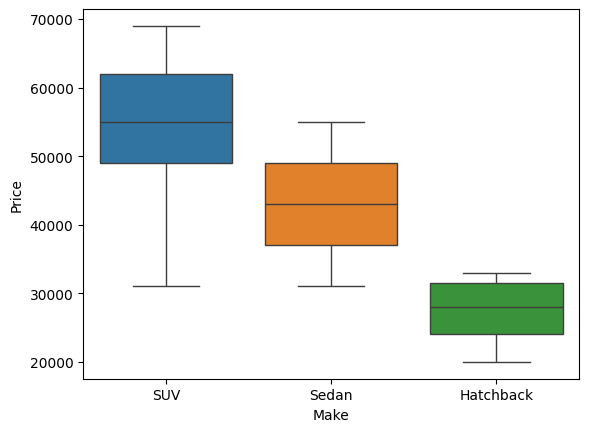

In [82]:
## Let's create a data frame for Female
df_womens = df.loc[df['Gender']=='Female']

## let's try to analyze the price structure where Females are focusing
sns.boxplot(data=df_womens, x='Make',y='Price',hue='Make');

In [83]:
df_womens.groupby('Make')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Hatchback,15.000,27466.667,4240.395,20000.000,24000.000,28000.000,31500.000,33000.000
SUV,173.000,53479.769,10378.079,31000.000,49000.000,55000.000,62000.000,69000.000
Sedan,141.000,42773.050,7248.023,31000.000,37000.000,43000.000,49000.000,55000.000


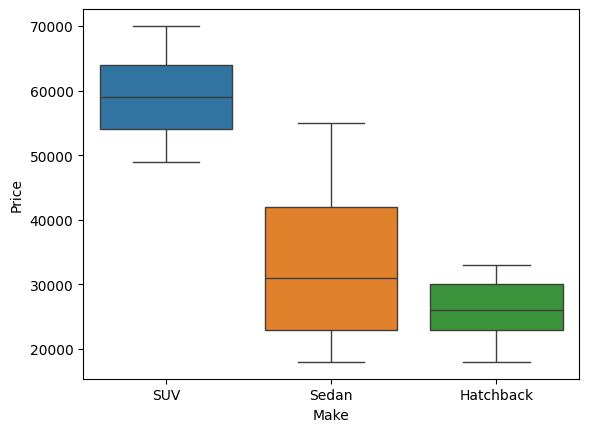

In [84]:
#Let's try to understand the male pattern
df_males = df.loc[df['Gender']=='Male']
sns.boxplot(data=df_males, x='Make',y='Price',hue='Make');

In [85]:
df_males.groupby('Make')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Hatchback,567.000,26447.972,4292.366,18000.000,23000.000,26000.000,30000.000,33000.000
SUV,124.000,59096.774,5946.126,49000.000,54000.000,59000.000,64000.000,70000.000
Sedan,561.000,32550.802,11023.903,18000.000,23000.000,31000.000,42000.000,55000.000


**Observation on female purchase**
- Male buyers demonstrate a preference for hatchback cars, but they also purchase sedans at a similar rate. Notably, they tend to opt for lower-priced sedan models, with a mean price of INR 32550.80.

- In contrast, female buyers show a higher inclination towards purchasing SUVs, which typically have higher prices. They also show interest in higher-priced sedan models, with mean prices of INR 53,479 for SUVs and INR 42,773 for sedans.

**Let's try to understand the effect of age group on price**

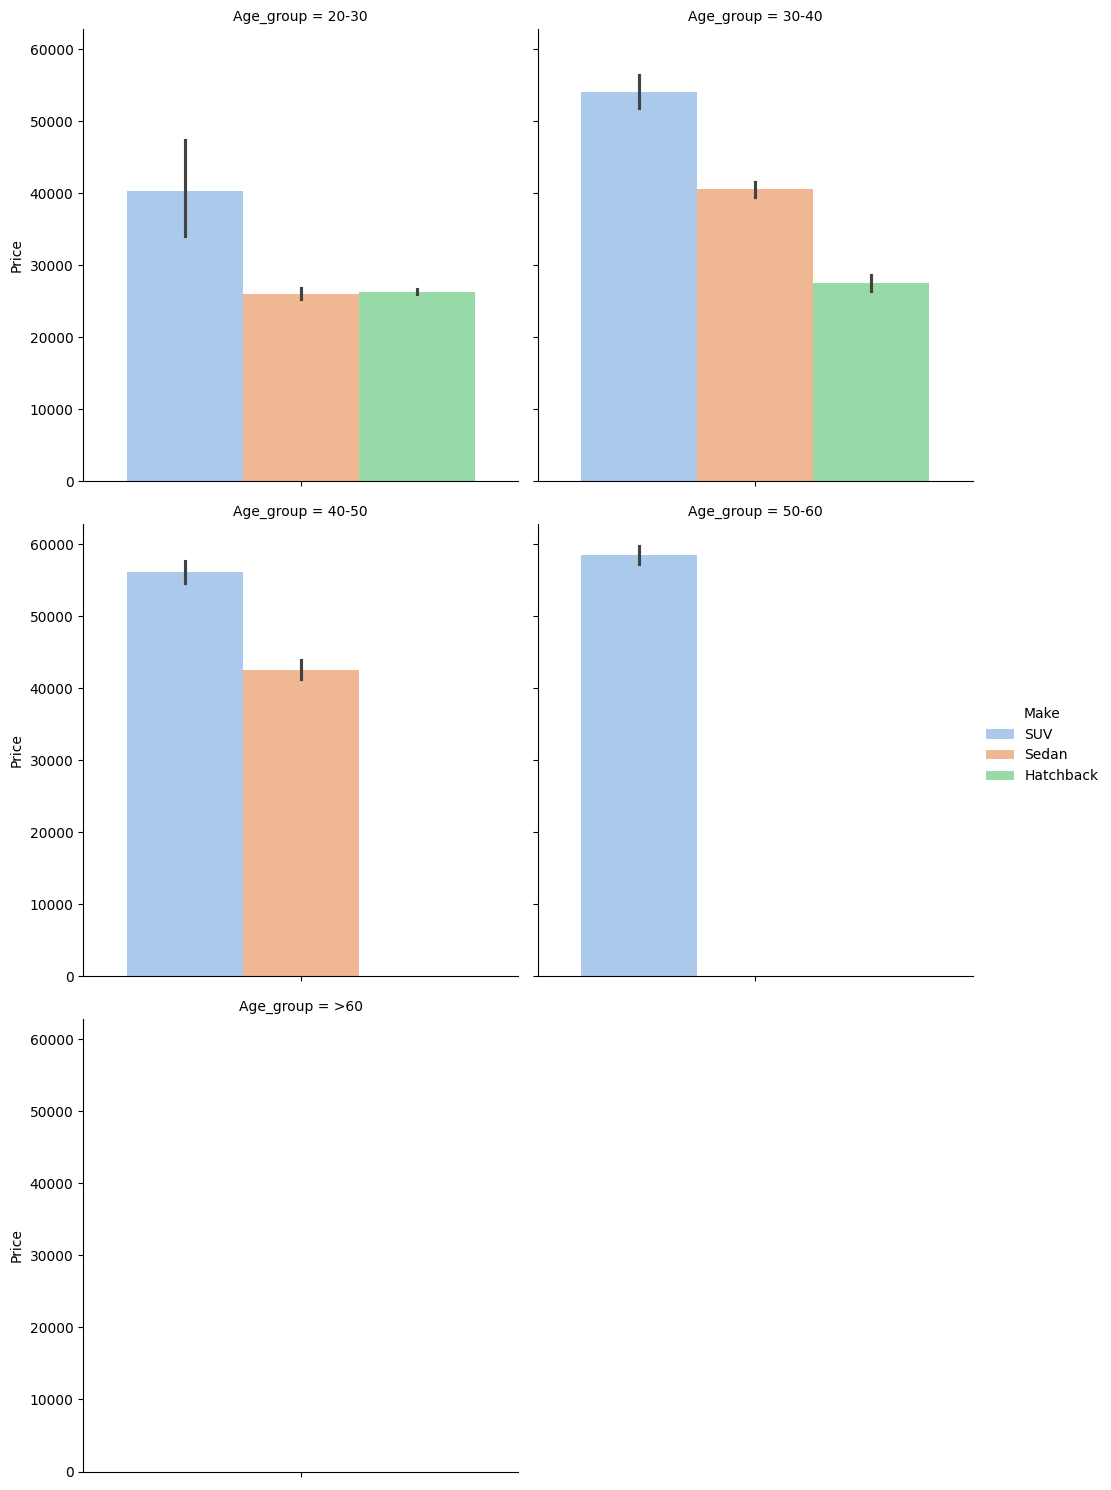

In [ ]:
sns.catplot(df,col='Age_group',y='Price',hue='Make',kind='bar',col_wrap=2,palette='pastel');

<ipython-input-58-b857aa583b6f>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(df,x='Age_group',y='Price',ci= False);


(0.0, 80000.0)

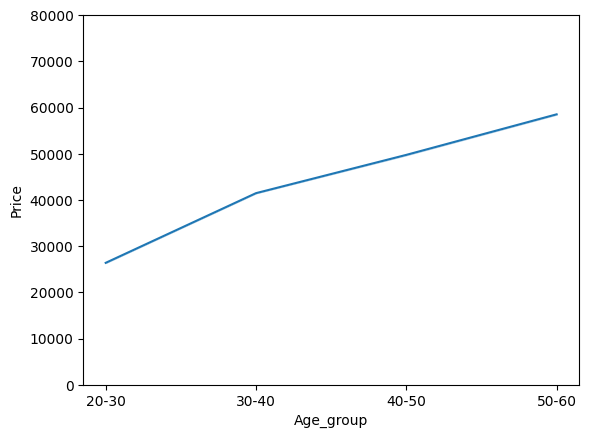

In [ ]:
sns.lineplot(df,x='Age_group',y='Price',ci= False);
plt.ylim(0,80000)

<ipython-input-60-3df97540ac71>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x="Age_group", y="Price", kind='box', palette='bright');


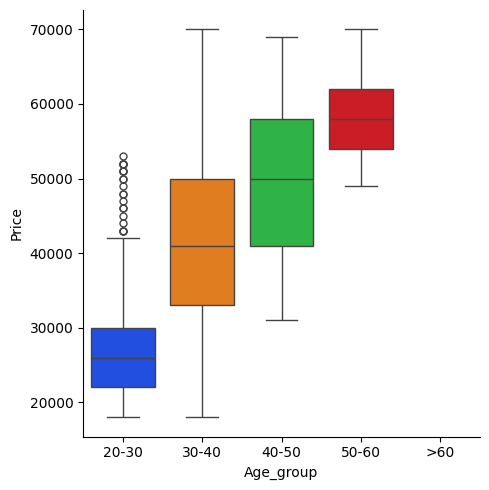

In [ ]:
sns.catplot(data=df, x="Age_group", y="Price", kind='box', palette='bright');

- As individuals grow older, they tend to have fewer dependents and allocate more spending towards higher-priced vehicles.

**Let's try to understand the effect of personal loan on price**

In [ ]:
## How much money was spent on purchasing automobiles by individuals who took a personal loan?
df.groupby('Personal_loan')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Personal_loan,,,,,,,,
No,789.000,36742.712,14534.345,18000.000,25000.000,32000.000,49000.000,70000.000
Yes,792.000,34457.071,12578.780,18000.000,24000.000,31000.000,45000.000,70000.000


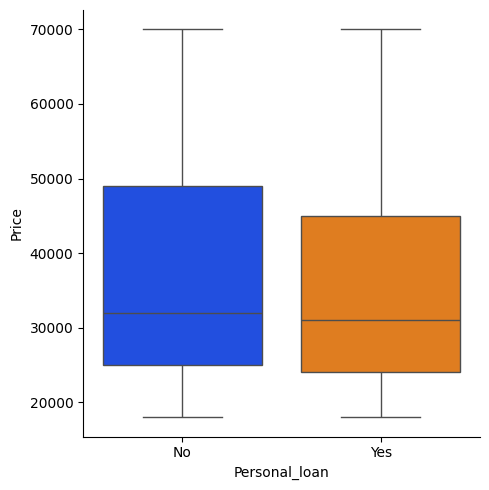

In [ ]:
sns.catplot(data=df, x="Personal_loan", y="Price", hue="Personal_loan", kind='box', palette='bright');

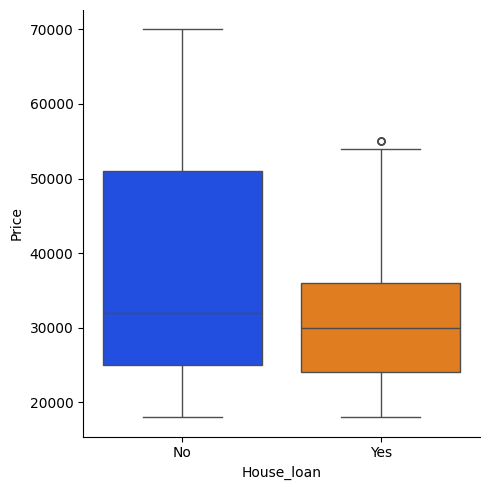

In [ ]:
sns.catplot(data=df, x="House_loan", y="Price", hue="House_loan", kind='box', palette='bright');

In [ ]:
df.groupby('House_loan')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
House_loan,,,,,,,,
No,1054.000,37707.780,14816.702,18000.000,25000.000,32000.000,51000.000,70000.000
Yes,527.000,31377.609,9596.008,18000.000,24000.000,30000.000,36000.000,55000.000


- For individuals who have taken a personal loan, about 75% of their purchases fall below INR 45,000, with a median purchase amount ranging between INR 31,000 and INR 32,000.
- Interestingly, there doesn't seem to be a significant difference in purchasing limits between those who have taken a personal loan and those who haven't.
- Nevertheless, there exists a significant correlation between having a house loan and one's purchasing behavior. Individuals with house loans tend to opt for cars with lower prices. Approximately 75% of individuals with house loans have bought cars priced at INR 36,000, with a mean purchase value of INR 313,777.609, considerably lower compared to those without loans.

**Let's check if there are any involvement of working partner on purchase of higher price cars**

In [ ]:
# How does having a working partner influence the purchase of higher-priced cars?
df.groupby('Partner_working')['Price'].describe()


,count,mean,std,min,25%,50%,75%,max
Partner_working,,,,,,,,
No,713.000,36000.000,13817.734,18000.000,25000.000,31000.000,48000.000,70000.000
Yes,868.000,35267.281,13479.533,18000.000,24000.000,31000.000,46000.000,70000.000


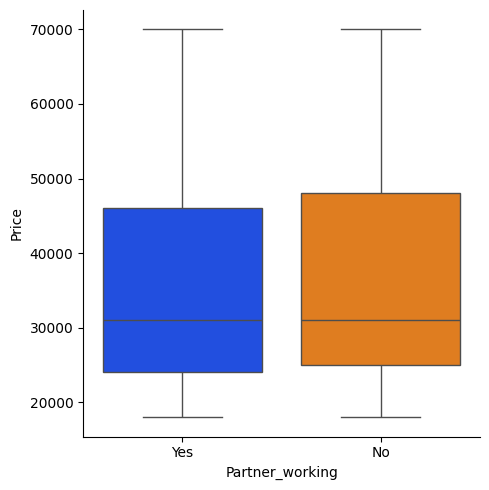

In [ ]:
sns.catplot(data=df, x="Partner_working", y="Price", hue="Partner_working", kind='box', palette='bright');

- There isn't a noticeable distinction to highlight. It appears that whether the partner is employed or not, the buying tendencies appear to be similar.

**Conclusions**
- Men showed a preference for Hatchback cars followed by Sedans, women tend to prefer SUVs followed by Sedans.
- Among salaried individuals, around 44.19% have opted for Sedan cars. Similarly, approximately 44.67% of business owners have chosen Sedan cars.
- Females tend to spend more on purchasing automobiles compared to males.
- Observed the uphill trend i.e. as the individual grow old they tend to allocate more spending towards higher-priced vehicles.
- For those with personal loans, around 75% of purchases are under INR 45,000, with a median purchase of INR 31,000 to INR 32,000. Surprisingly, the purchasing limits show little variation between loan holders and non-holders.
- There isn't a significant observable difference in purchasing tendencies based on whether the partner is working or not.




**Business Recommendations**
- Since men prefer Hatchback cars and women prefer SUVs, Austo Automobiles could consider expanding their product line to include more SUV models targeted towards female customers. This could help tap into a segment of the market with high potential for sales growth.
- Recognizing that females tend to spend more on purchasing automobiles, Austo Automobiles should develop marketing campaigns specifically targeting female customers. This could include advertisements highlighting features that appeal to female preferences and creating a welcoming and inclusive buying experience at dealerships.
- Since older individuals tend to allocate more spending towards higher-priced vehicles, Austo Automobiles could introduce premium or luxury car models aimed at this demographic. These vehicles could feature advanced technology, comfort, and safety features that appeal to older customers.
- Since there isn't a significant observable difference in purchasing tendencies based on whether the partner is working or not, Austo Automobiles should prioritize delivering an exceptional customer experience to all customers. This includes providing excellent pre-sales and after-sales service, offering test drives, and ensuring a seamless buying process.


